In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


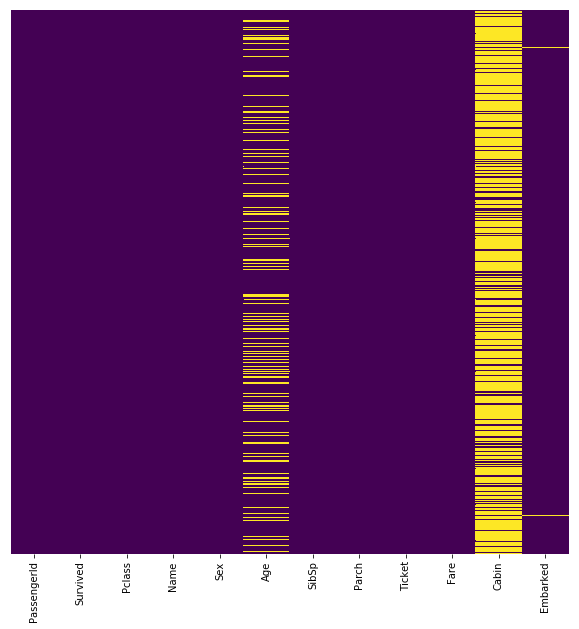

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

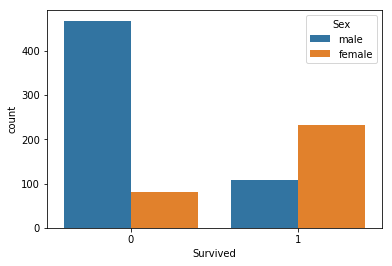

In [8]:
sns.countplot(x='Survived', data=train, hue='Sex')

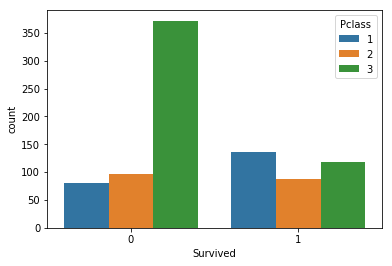

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass')

In [10]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

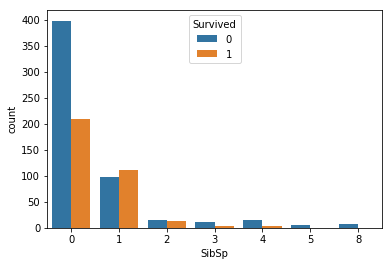

In [24]:
sns.countplot(x='SibSp', data=train, hue='Survived')

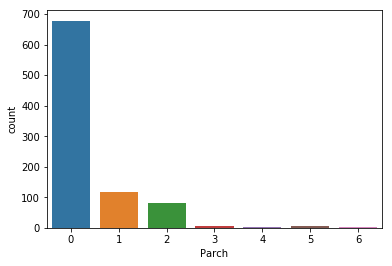

In [29]:
sns.countplot(x='Parch', data=train)

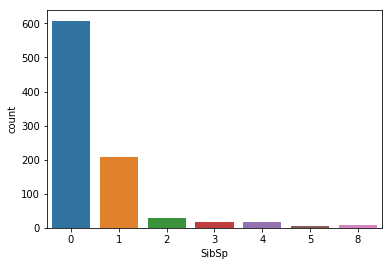

In [32]:
sns.countplot(train['SibSp'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


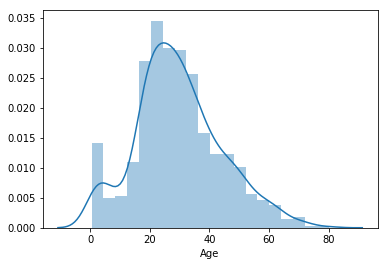

In [34]:
sns.distplot(train['Age'].dropna())

In [11]:
sns.set_style('whitegrid')

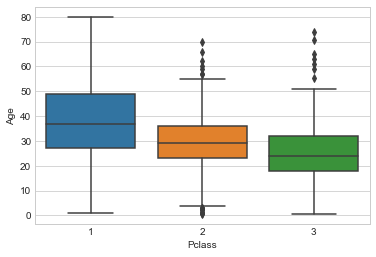

In [12]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [13]:
train[train['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [14]:
train[train['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [15]:
train[train['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [17]:
def modify_age(row):
    age = row[0]
    pclass = row[1]
    
    if not pd.isna(age):
        return age
    
    if pclass == 1:
        return 38.2
    elif pclass == 2:
        return 29.8
    else:
        return 25.1

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(modify_age, axis=1)

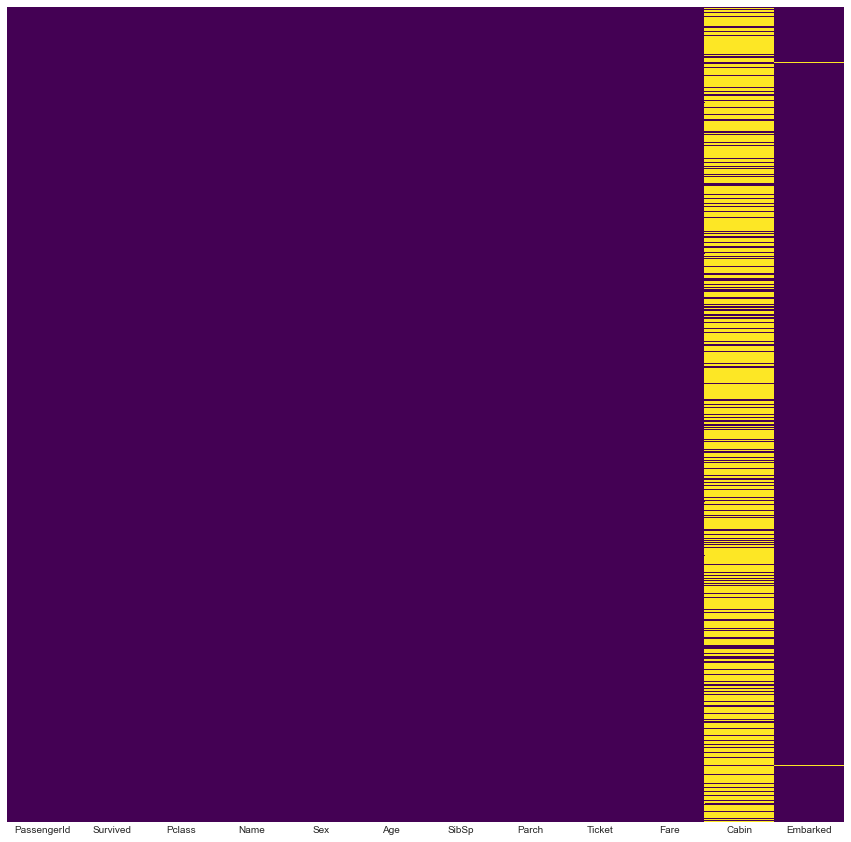

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
train.drop('Cabin', axis=1, inplace=True)

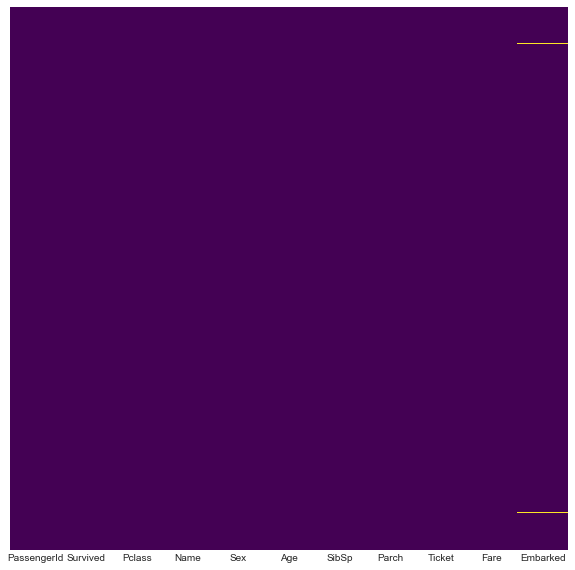

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
train.dropna(inplace=True)

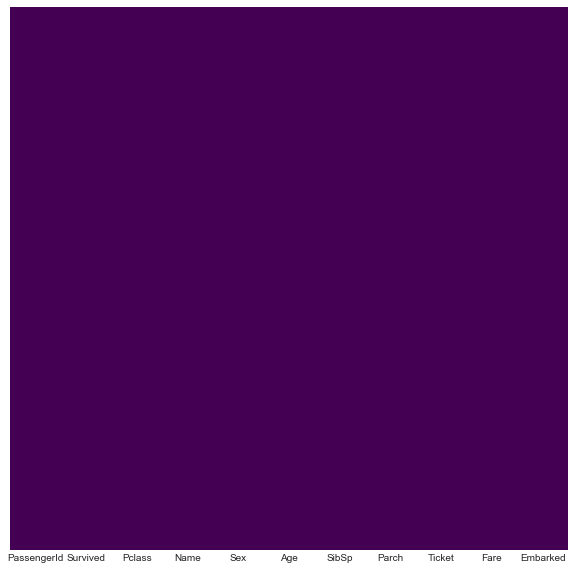

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [27]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
train.drop(['PassengerId','Name','Ticket',], axis=1, inplace=True)

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
train['Male'] = pd.get_dummies(train['Sex'], drop_first=True)

In [33]:
embarked_dummy = pd.get_dummies(train['Embarked'], drop_first=True)

In [34]:
train = pd.concat([train, embarked_dummy],axis=1)

In [35]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
# Randomizing our dataframe
train = train.sample(frac=1).reset_index(drop=True)

In [38]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
predictions = lr.predict(X_train)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_train, predictions))

             precision    recall  f1-score   support

          0       0.82      0.87      0.85       549
          1       0.77      0.69      0.73       340

avg / total       0.80      0.80      0.80       889



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_train, predictions)

true negatives C_{0,0}

false negatives  C_{1,0}

true positives is C_{1,1}

false positives is C_{0,1}

In [47]:
print("TN", cm[0,0])
print("FN", cm[1,0])
print("TP", cm[1,1])
print("FP", cm[0,1])

TN 480
FN 107
TP 233
FP 69


In [65]:
test = pd.read_csv('titanic_test.csv')

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


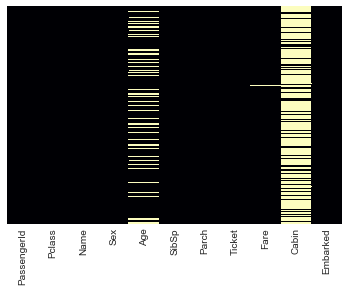

In [67]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [68]:
PassengerID = test['PassengerId']

In [69]:
test['Age'] = test[['Age', 'Pclass']].apply(modify_age, axis=1)
test.drop('Cabin', axis=1, inplace=True)
test.dropna(inplace=True)
test.drop(['PassengerId','Name','Ticket',], axis=1, inplace=True)
test['Male'] = pd.get_dummies(test['Sex'], drop_first=True)
embarked_dummy = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, embarked_dummy],axis=1)
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)
# Randomizing our dataframe
test = test.sample(frac=1).reset_index(drop=True)
X_test = test

In [70]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,3,27.0,0,0,8.6625,1,0,1
1,3,29.0,0,0,7.8542,1,0,1
2,3,7.0,1,1,15.2458,1,0,0
3,1,55.0,0,0,27.7208,0,0,0
4,3,2.0,1,1,20.2125,0,0,1


In [71]:
test['Predictions'] = lr.predict(X_test)

In [72]:
test.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S,Predictions
277,3,47.0,1,0,7.0000,0,0,1,0
118,3,25.1,0,4,25.4667,0,0,1,1
296,1,48.0,0,0,50.4958,1,0,0,0
7,3,21.0,0,0,7.7750,1,0,1,0
416,2,21.0,1,0,11.5000,1,0,1,0


In [73]:
test['PassengerID'] = PassengerID

In [74]:
test.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S,Predictions,PassengerID
272,2,18.5,0,0,13.0000,1,0,1,0,1164
135,3,27.0,0,0,7.8542,1,0,1,0,1027
253,1,43.0,1,0,55.4417,0,0,0,1,1145
240,3,18.0,0,0,8.0500,0,0,1,1,1132
111,1,53.0,0,0,28.5000,1,0,0,0,1003
